In [1]:
!pip3 install xgboost

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
matplotlib.rcParams['figure.figsize']=(5,5)

Documentation

1. finding missing values in the dataset

2. some values of diameter was missing.so removed those rows from dataset

3. Some of the parameters were missing most of the values(more than 90%) so removing those parameters as they will not be providing sufficient information about the diameter.

4. Changing the datatype of diameter from Object to Float.

5. Plotting graphs to understant the distribution of data points.

In [3]:
asteroid=pd.read_csv("Asteroid2.csv",engine='python')

In [4]:
asteroid.shape

(839714, 31)

In [5]:
asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [6]:
asteroid['class'].value_counts()

MBA    747420
OMB     24715
IMB     17552
MCA     17354
APO     11759
AMO      8020
TJN      7385
TNO      3310
ATE      1601
CEN       488
AST        84
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

In [7]:
print("columns in asteroid",list(asteroid.columns))

columns in asteroid ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


info regarding columns


*   name=Name of asteroid
*   a= semi major axis
*   e-eccentricity
*   i- inclination with respect to x-y elliptical plane
*   om - longitude of the ascending node
*   w- argument of perihelion
*   q - perihelion distance
*   ad - aphelion distance
*   per_y - orbital period
*   data_Arc - data arc span(d)
*   condition_Code = orbit condition code
*   n_obs_used - number of observation used
*   H - absolute magnitude parameter
*   neo-Near earth object
*   pha - Physically hazardous object
*   diameter - diameter of asteroids
*   extent - Object bi/tri axial ellipsoid dimensions(Km)
*   albedo - geometric albedo
*   rot_per - rotation period



In [8]:
#finding missing values in dataset
asteroid.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [9]:
#looking at missing values of diameter
asteroid[asteroid['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [10]:
#removing those columns which have missing values of diameter
asteroid=asteroid.dropna(subset=['diameter'])

In [11]:
asteroid.shape

(137636, 31)

In [12]:
asteroid.isnull().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [13]:
#removing those variable which have a lot of missing values
asteroid=asteroid.drop('name',axis=1)
asteroid=asteroid.drop('extent',axis=1)
asteroid=asteroid.drop('GM',axis=1)
asteroid=asteroid.drop('BV',axis=1)
asteroid=asteroid.drop('UB',axis=1)
asteroid=asteroid.drop('IR',axis=1)
asteroid=asteroid.drop('spec_B',axis=1)
asteroid=asteroid.drop('spec_T',axis=1)
asteroid=asteroid.drop('G',axis=1)
asteroid=asteroid.drop('rot_per',axis=1)

In [14]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [15]:
asteroid.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [16]:
asteroid['diameter']=asteroid['diameter'].astype(float)
asteroid['a']=asteroid['a'].astype(float)

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'diameter'}>],
       [<AxesSubplot:title={'center':'albedo'}>,
        <AxesSubplot:title={'center':'moid'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'per'}>],
       [<AxesSubplot:title={'center':'ma'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

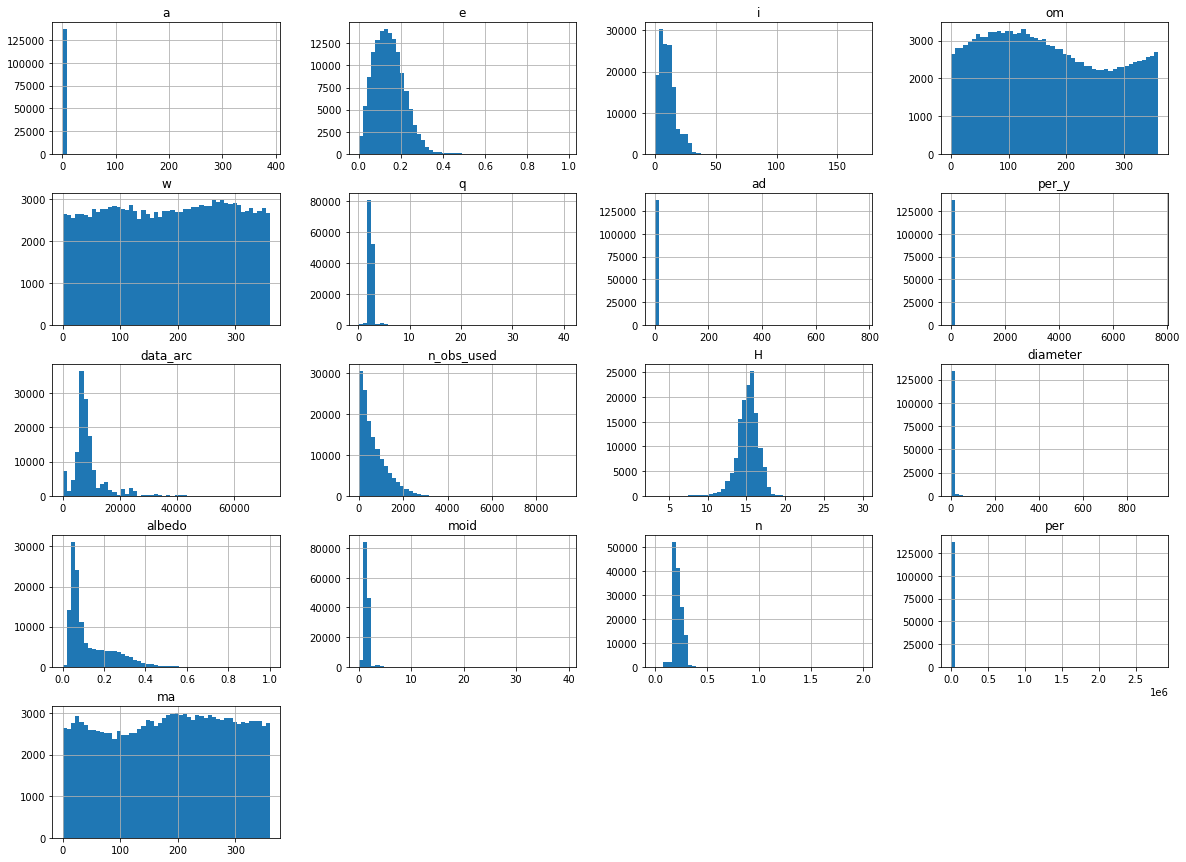

In [17]:
asteroid.hist(bins=50, figsize=(20 ,15))

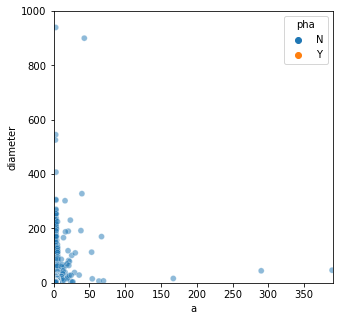

In [18]:
sns.scatterplot(data=asteroid,x='a',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,390])
plt.ylim([0,1000])
plt.show();

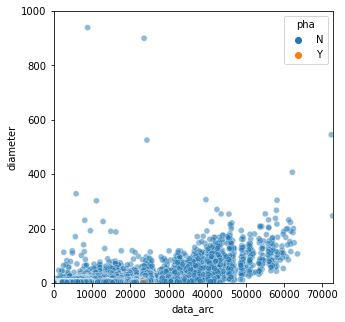

In [19]:
sns.scatterplot(data=asteroid,x='data_arc',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,72684])
plt.ylim([0,1000])
plt.show();

In [20]:
max(asteroid['albedo'])

1.0

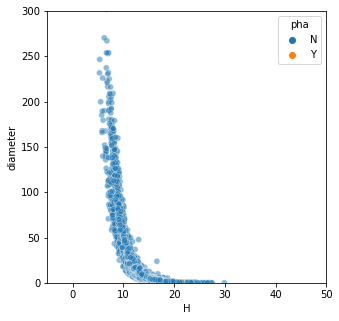

In [21]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([-5,50])
plt.ylim([0,300])
plt.show();

In [22]:
asteroid['H'] = -1*np.log(asteroid['H'])
asteroid['H'].max()

-1.1631508098056809

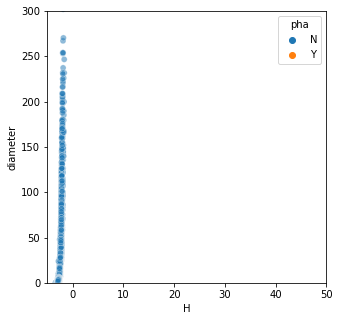

In [23]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([-5,50])
plt.ylim([0,300])
plt.show();

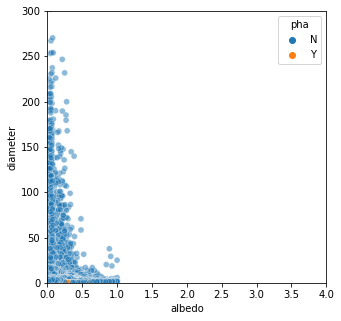

In [24]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,4])
plt.ylim([0,300])
plt.show();

In [25]:
asteroid['albedo'] = -1*np.log(asteroid['albedo'])
asteroid['albedo'].max()

6.907755278982137

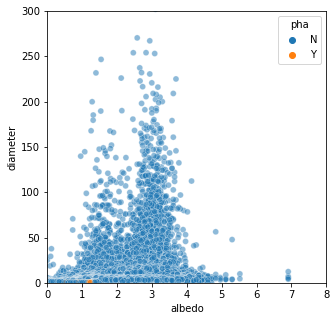

In [26]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,8])
plt.ylim([0,300])
plt.show();

In [27]:
asteroid['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [28]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [29]:
asteroid.shape

(137636, 21)

data_arc=i,n_obs_used,H,diameter,albedo,data_arc (6)

H=e,q,data_arc,n_obs_used,diameter,albedo,moid,n  (8)

albedo=a,q,data_arc,n_obs_used,H,diameter,moid,n  (8)

## **EDA**

In [30]:
cols=['data_arc','H','albedo']

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
asteroid[cols] = impute_knn.fit_transform(asteroid[cols])

In [32]:
asteroid.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

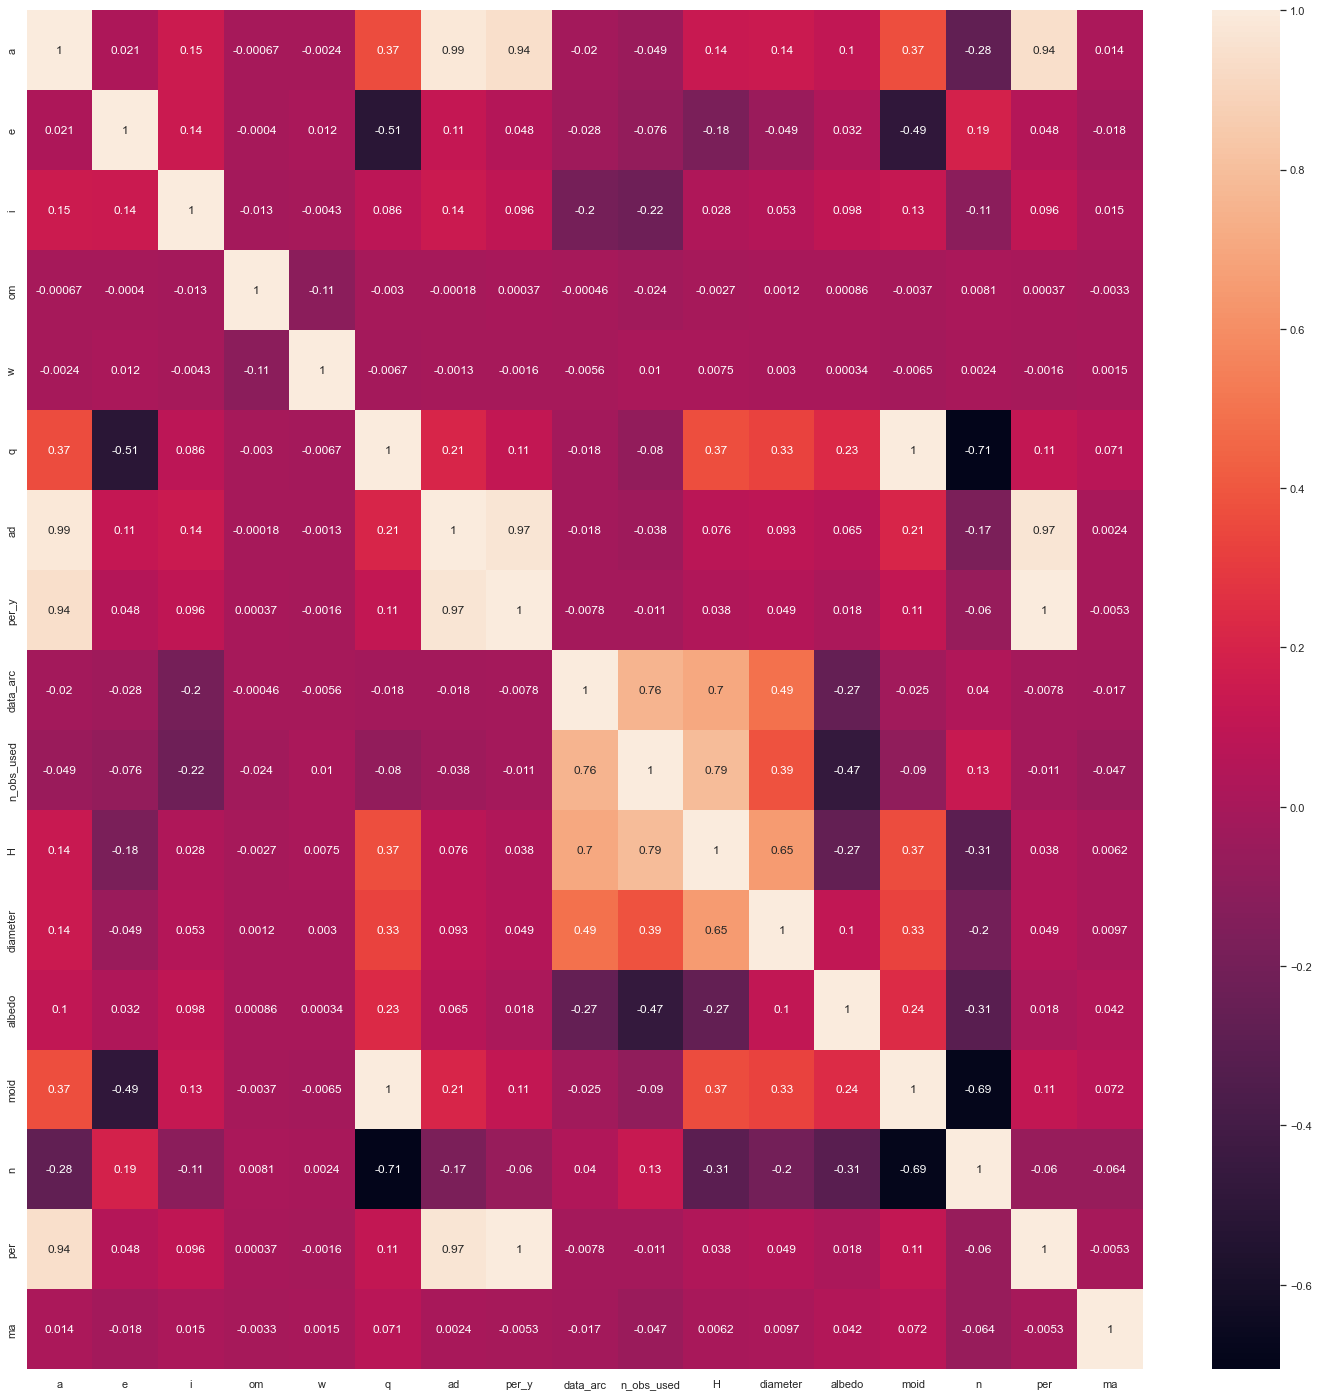

In [33]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(asteroid.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

C:\Users\Adamya Vashisth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data_arc'>

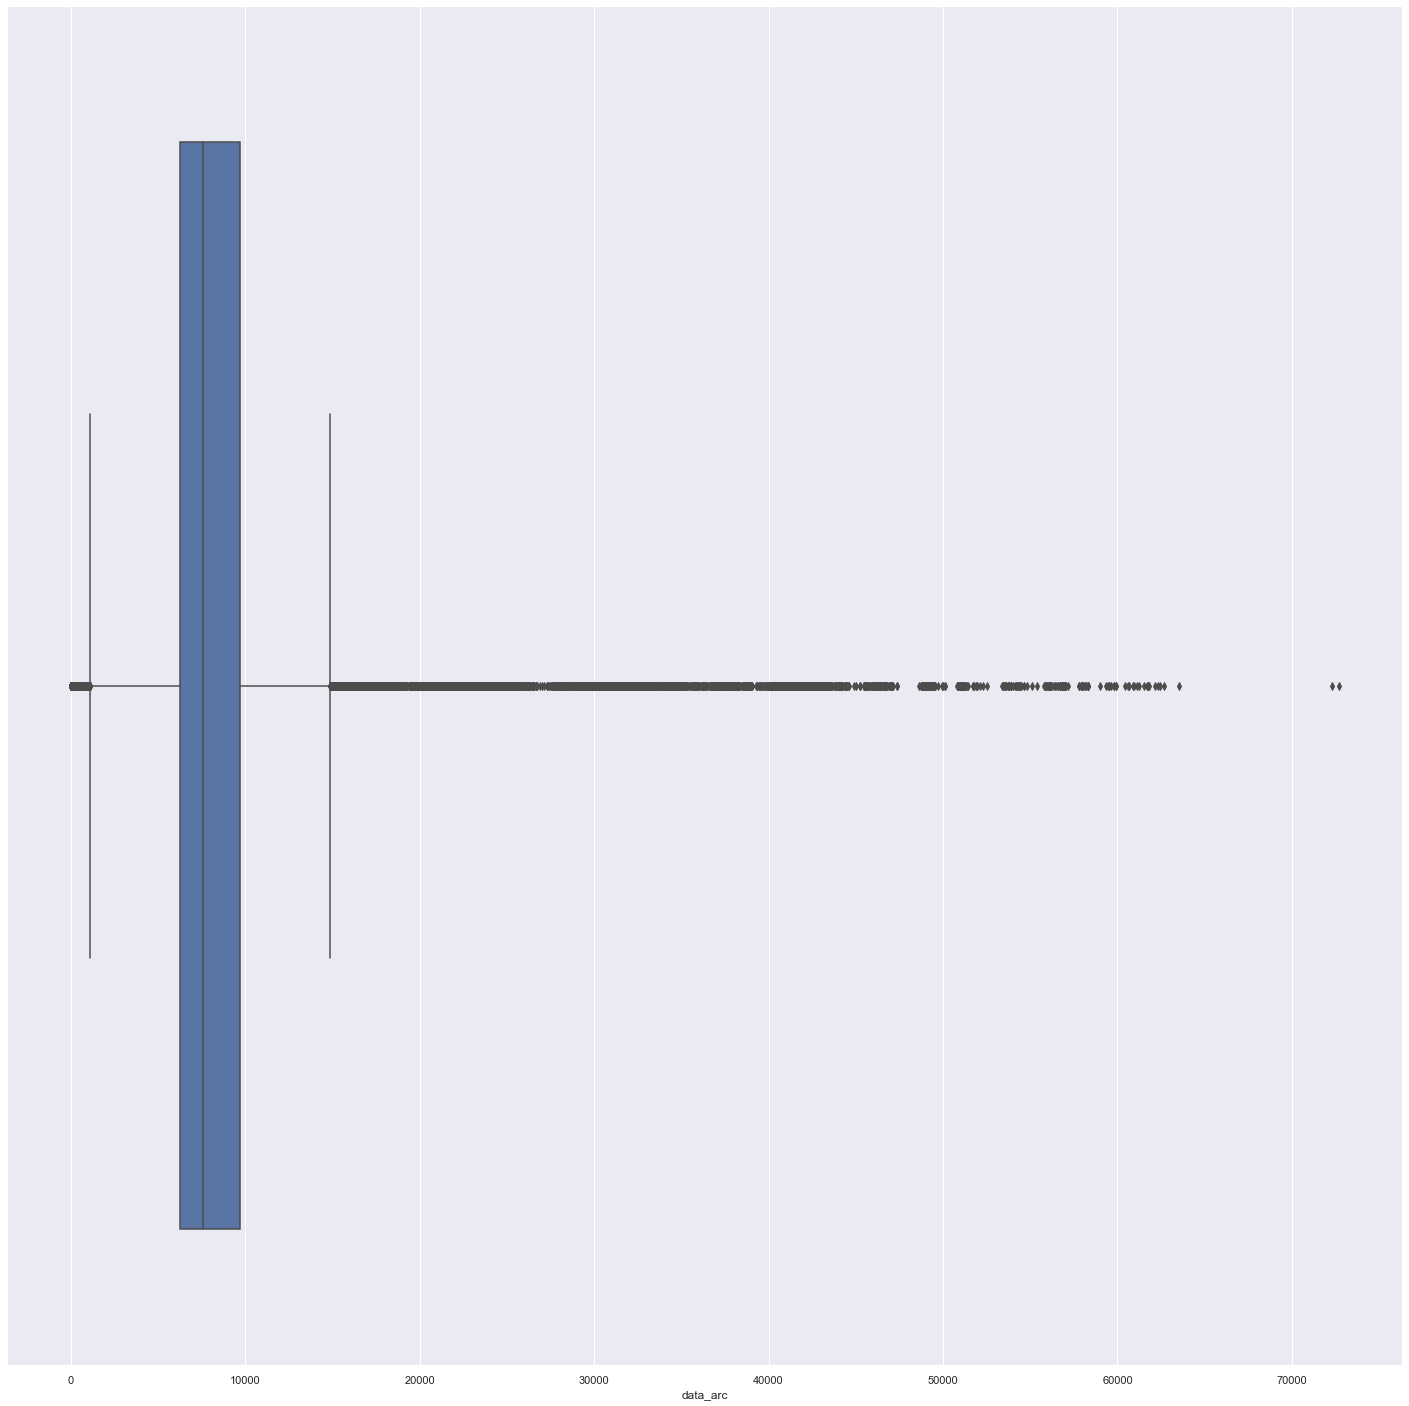

In [34]:
sns.boxplot(asteroid['data_arc'])

C:\Users\Adamya Vashisth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='albedo'>

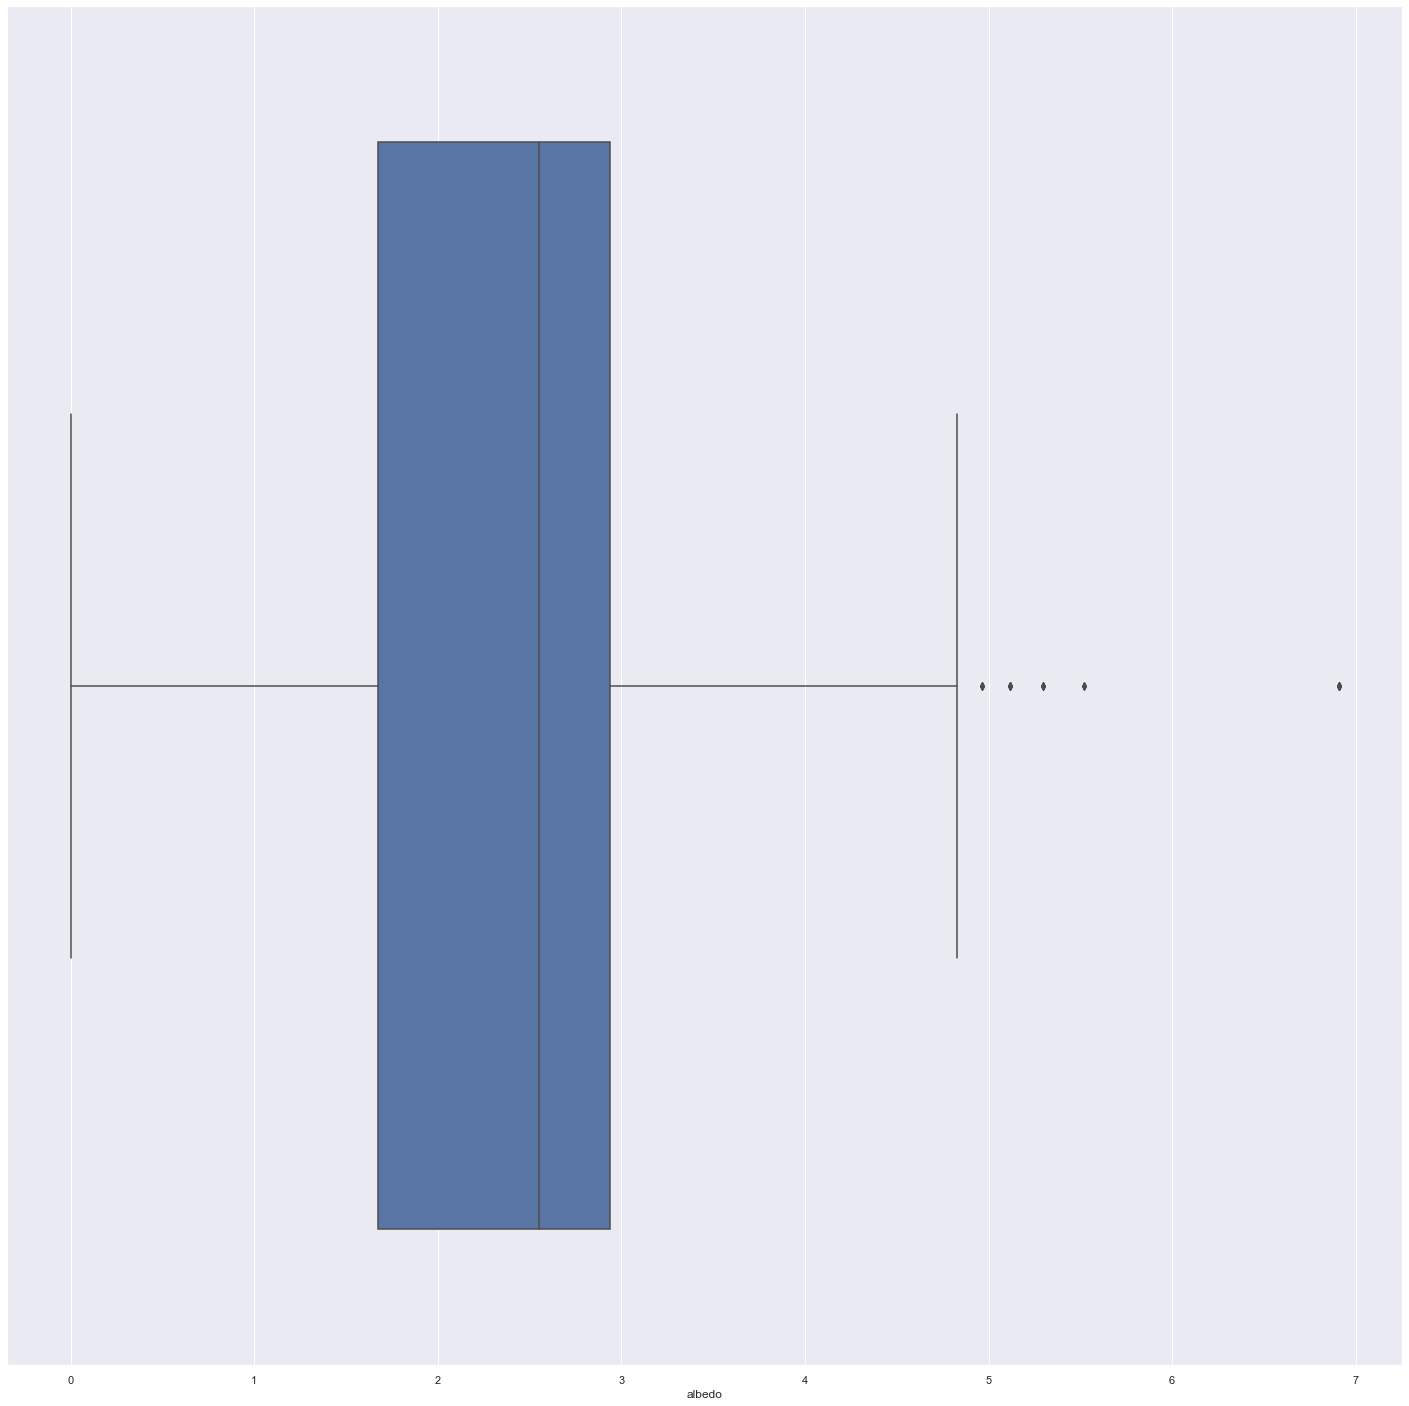

In [35]:
sns.boxplot(asteroid['albedo'])

In [36]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  e = -0.14813765496168466
corelation of  i = 0.132370681553146
corelation of  om = 0.0014940115733321705
corelation of  w = 0.005160507891247732
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  data_arc = 0.3738177316963192
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = 0.7453447486469593
corelation of  diameter = 0.9999999999999998
corelation of  albedo = 0.26240106500278454
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  ma = 0.03229989195106305


In [37]:
#combining low corelation features together in ration of their corelation so on reducing dimension all info from those is not lost
asteroid['neg']=-0.14*asteroid['e']+0.26*asteroid['albedo']
asteroid['pos']=0.13*asteroid['i']+0.0014*asteroid['om']+0.005*asteroid['w']+0.032*asteroid['ma']+0.37*asteroid['data_arc']
asteroid.drop(['e','albedo'],axis=1,inplace=True)
asteroid.drop(['i','om','w','ma','data_arc'],axis=1,inplace=True)

In [38]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = 0.7453447486469593
corelation of  diameter = 0.9999999999999998
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  neg = 0.2711543239710166
corelation of  pos = 0.37441909407041135


In [39]:
asteroid["neo"]=asteroid["neo"].replace({'Y':1,'N':0})
asteroid["pha"]=asteroid["pha"].replace({'Y':1,'N':0})
df=['n']
asteroid[df]=-1*asteroid[df]

In [40]:
asteroid=asteroid.drop(['class'],axis=1)
asteroid=asteroid.drop(['condition_code'],axis=1)

In [68]:
from sklearn.model_selection import train_test_split
predictors = asteroid.drop('diameter',axis=1) 
target = asteroid['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# **Predicting values**

# **PREDICTING VALUES USING DL**

In [42]:
!pip install keras

In [43]:
!pip install tensorflow

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
asteroid.shape

(137636, 14)

Define network for prediction

In [46]:
 model = Sequential([
	Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'),
	Dense(28, kernel_initializer='normal', activation='relu'),
	Dense(1, kernel_initializer='normal')
   ])

In [47]:
 model.compile(loss='mean_squared_error', optimizer='adam')


In [48]:
x =asteroid.drop(['diameter'],axis=1)

In [49]:
x_y=asteroid['diameter']

In [50]:
x=x.dropna()

In [51]:
x_y=x_y.dropna()

In [52]:
from sklearn import preprocessing

In [53]:
min_max_scaler = preprocessing.MinMaxScaler()
arc_scale = min_max_scaler.fit_transform(x)

In [54]:
x.isna().sum()

a             0
q             0
ad            0
per_y         0
n_obs_used    0
H             0
neo           0
pha           0
moid          0
n             0
per           0
neg           0
pos           0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
arc_train, arc_val_and_test, arc_y_train, arc_y_val_and_test = train_test_split(arc_scale, x_y, test_size=0.3)

In [57]:
arc_val, arc_test, arc_y_val, arc_y_test = train_test_split(arc_val_and_test, arc_y_val_and_test, test_size=0.5)

In [61]:

hist = model.fit(arc_train, arc_y_train,
          batch_size=1000, epochs=400,
          validation_data=(arc_val, arc_y_val))

Epoch 1/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7606 - val_loss: 14.1211
Epoch 2/400
97/97 [==============================] - 0s 4ms/step - loss: 1.7549 - val_loss: 13.9693
Epoch 3/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7594 - val_loss: 13.8138
Epoch 4/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7414 - val_loss: 13.8185
Epoch 5/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7562 - val_loss: 13.7413
Epoch 6/400
97/97 [==============================] - 0s 4ms/step - loss: 1.7405 - val_loss: 13.7294
Epoch 7/400
97/97 [==============================] - 0s 4ms/step - loss: 1.7456 - val_loss: 13.6117
Epoch 8/400
97/97 [==============================] - 0s 4ms/step - loss: 1.7656 - val_loss: 13.7552
Epoch 9/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7245 - val_loss: 13.5237
Epoch 10/400
97/97 [==============================] - 0s 3ms/step - loss: 1.6969 - val_loss: 13.1608

97/97 [==============================] - 0s 3ms/step - loss: 1.4984 - val_loss: 10.6960
Epoch 83/400
97/97 [==============================] - 0s 3ms/step - loss: 1.4631 - val_loss: 10.7043
Epoch 84/400
97/97 [==============================] - 0s 3ms/step - loss: 1.4791 - val_loss: 10.7620
Epoch 85/400
97/97 [==============================] - 0s 3ms/step - loss: 1.4931 - val_loss: 10.8856
Epoch 86/400
97/97 [==============================] - 0s 4ms/step - loss: 1.4597 - val_loss: 10.4614
Epoch 87/400
97/97 [==============================] - 0s 4ms/step - loss: 1.4750 - val_loss: 10.4944
Epoch 88/400
97/97 [==============================] - 0s 4ms/step - loss: 1.4602 - val_loss: 10.5225
Epoch 89/400
97/97 [==============================] - 0s 4ms/step - loss: 1.4607 - val_loss: 10.6961
Epoch 90/400
97/97 [==============================] - 1s 5ms/step - loss: 1.4697 - val_loss: 10.7193
Epoch 91/400
97/97 [==============================] - 0s 3ms/step - loss: 1.4777 - val_loss: 10.9409
Epo

Epoch 163/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3450 - val_loss: 9.6452
Epoch 164/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3237 - val_loss: 9.3891
Epoch 165/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3480 - val_loss: 9.8991
Epoch 166/400
97/97 [==============================] - 0s 3ms/step - loss: 1.3617 - val_loss: 9.8596
Epoch 167/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3363 - val_loss: 9.7897
Epoch 168/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3533 - val_loss: 9.8039
Epoch 169/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3453 - val_loss: 9.6767
Epoch 170/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3339 - val_loss: 9.8509
Epoch 171/400
97/97 [==============================] - 0s 4ms/step - loss: 1.3263 - val_loss: 9.4113
Epoch 172/400
97/97 [==============================] - 0s 3ms/step - loss: 1.3504 - val_los

97/97 [==============================] - 0s 4ms/step - loss: 1.2717 - val_loss: 8.7499
Epoch 245/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2730 - val_loss: 9.0381
Epoch 246/400
97/97 [==============================] - 0s 3ms/step - loss: 1.2593 - val_loss: 9.2322
Epoch 247/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2659 - val_loss: 9.8052
Epoch 248/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2833 - val_loss: 8.9875
Epoch 249/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2900 - val_loss: 9.1008
Epoch 250/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2605 - val_loss: 8.9914
Epoch 251/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2575 - val_loss: 9.0167
Epoch 252/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2465 - val_loss: 8.8025
Epoch 253/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2428 - val_loss: 9.2124
Epoc

97/97 [==============================] - 0s 3ms/step - loss: 1.2089 - val_loss: 9.4954
Epoch 326/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2445 - val_loss: 8.5815
Epoch 327/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2096 - val_loss: 8.7395
Epoch 328/400
97/97 [==============================] - 0s 3ms/step - loss: 1.2679 - val_loss: 8.5645
Epoch 329/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2057 - val_loss: 8.7992
Epoch 330/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2475 - val_loss: 8.6265
Epoch 331/400
97/97 [==============================] - 0s 3ms/step - loss: 1.2201 - val_loss: 8.5086
Epoch 332/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2055 - val_loss: 9.1553
Epoch 333/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2199 - val_loss: 8.5729
Epoch 334/400
97/97 [==============================] - 0s 4ms/step - loss: 1.2196 - val_loss: 8.5967
Epoc

In [62]:
model.evaluate(arc_test, arc_y_test)

646/646 [==============================] - 1s 2ms/step - loss: 1.6770


1.6770284175872803

In [63]:
x_new=model.predict(arc_test)

646/646 [==============================] - 1s 2ms/step


In [64]:
score(x_new)

0.9831196836036236

# **Random Forest regressor** 

In [60]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(arc_y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(arc_y_test,prediction, c='orange',label='predictions')
    ax2.plot(arc_y_test,arc_y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diameter')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale 
def score(prediction):
    score = r2_score(prediction,arc_y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))

In [69]:

algorithms = []
scores = []
### Defining the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=22, n_estimators=50)

### Training 
forest.fit(arc_train,np.ravel(arc_y_train))

###Predicting
arc_y_pred_forest = forest.predict(arc_test)

### Scoring
score_forest = score(arc_y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.797


# **linear regressor**

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : -0.383
rms value for the regression  : 8.232


C:\Users\Adamya Vashisth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Adamya Vashisth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


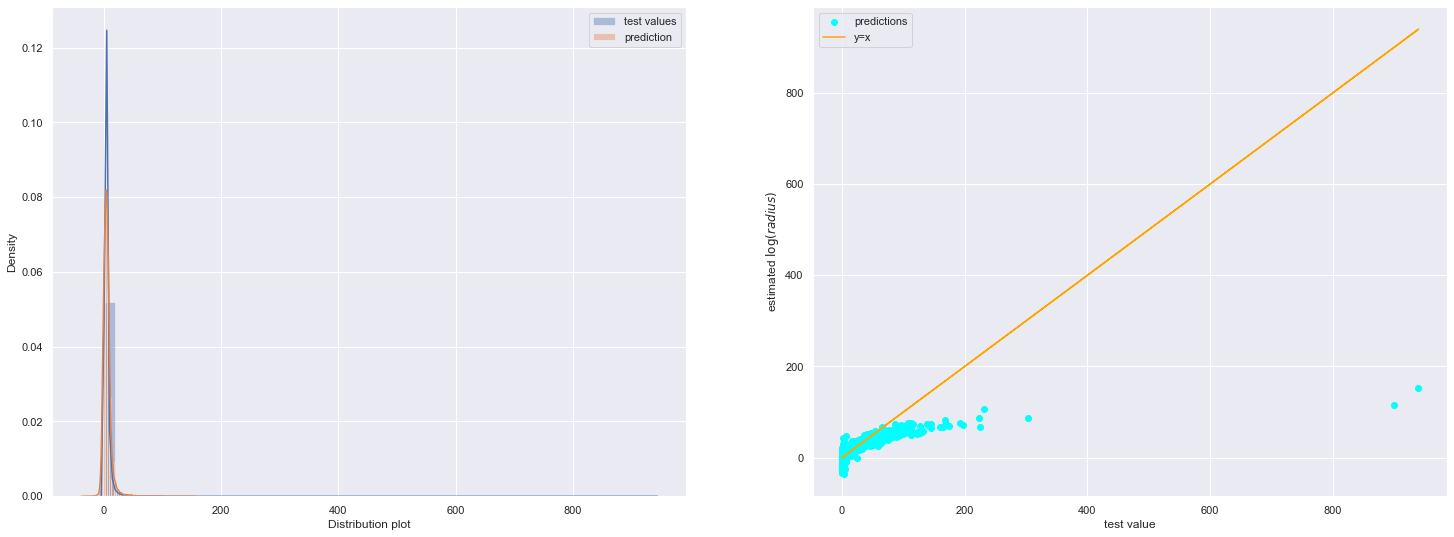

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

# **Polynomial regressor**

In [72]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)

pr.fit(X_train,Y_train)
x_poly=pr.fit_transform(X_train)
X_test_poly=pr.fit_transform(X_test)
###Training
lr.fit(x_poly,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test_poly)

###Scoring
score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.925
rms value for the regression  : 2.743


# **XG boost**

In [73]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test)

### Scoring
score_xgb = r2_score(Y_pred_xgb,Y_test)
print("R^2 value for the regression  :",  round(score_xgb,3))
rms = mean_squared_error(Y_test, Y_pred_xgb, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.613
rms value for the regression  : 5.272


SVM

In [ ]:
from sklearn import svm
svmreg = svm.SVR()


svmreg.fit(X_train,Y_train)


Y_pred_svm = svmreg.predict(X_test)

score_svm = r2_score(Y_pred_svm,Y_test)
print("R^2 value for the regression  :",  round(score_svm,3))
rms = mean_squared_error(Y_test, Y_pred_svm, squared=False)
print("rms value for the regression  :",  round(rms,3))

# **DL Network** 
this part not working showing error of storage


In [66]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
class NeuralNet():
  def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
  def init_weights(self):
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
  def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))
  def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
  def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)
  def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = Z2
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
  def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.params['Z1']
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
  def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
  def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = Z1
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)
  def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {Y_train.shape}")
print(f"Shape of test labels is {Y_test.shape}")

In [ ]:

    nn = NeuralNet() # create the NN model
    nn.fit(x_train, y_train) #train the model

In [ ]:
NeuralNet.predict(nn,X_test)

In [ ]:

nn_architecture = [
    {"input_dim": 13, "output_dim": 28, "activation": "relu"},
    {"input_dim": 28, "output_dim": 12, "activation": "relu"},
    {"input_dim": 12, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]

In [ ]:
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values

In [ ]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [ ]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    return activation_func(Z_curr), Z_curr

In [ ]:
def full_forward_propagation(X, params_values, nn_architecture):
    memory = {}
    A_curr = X
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    return A_curr, memory

In [ ]:
def get_cost_value(Y_hat, Y):
    m = Y_hat.shape[1]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()

In [ ]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    
    if activation is "relu":
        backward_activation_func = relu_backward
    elif activation is "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')
    
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

In [ ]:
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[0]
    Y = Y.values.reshape(Y_hat.shape)
   
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

In [ ]:
def update(params_values, grads_values, nn_architecture, learning_rate):
    for layer_idx, layer in enumerate(nn_architecture):
        params_values["W" + str(layer_idx)] = learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] = learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;

In [ ]:

def train(X, Y, nn_architecture, epochs, learning_rate):
    params_values = init_layers(nn_architecture, 2)
    cost_history = []
    accuracy_history = []
    
    for i in range(epochs):
        Y_hat, cashe = full_forward_propagation(X, params_values, nn_architecture)
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        
        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        
    return params_values, cost_history, accuracy_history

In [ ]:
train(X_train.T,Y_train,nn_architecture,10,0.0001)

In [ ]:
X_train.shape

In [ ]:
asteroid[2:3]